# **Importing all the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
max_rows=83
max_cols=83
pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing the dataset**

In [ ]:
var_des = pd.read_excel('EQ_2021_Data_Dictionary.xlsx')
data = pd.read_csv('EQ_2021_Data_Sample.csv')

In [ ]:
data.shape

(1179375, 82)

In [ ]:
data.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,101.51,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,12.1,15.9,14.4,58233.0,55514.0,27053.0,28461.0,21383.0,22185.0,0.2364,0.18,0.0257,26127.0,25513.0,2.4,NaN,NaN,NaN,NaN,116.0,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.12,NaN,94.32,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,10.1,13.5,13.3,59871.0,190790.0,93035.0,97755.0,81423.0,85193.0,0.1679,0.10,0.0458,95993.0,93689.0,2.4,NaN,NaN,NaN,NaN,269.0,-17.0,-495.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,27.1,41.0,39.5,35972.0,27201.0,14602.0,12599.0,7397.0,6338.0,0.5355,0.47,0.0509,8624.0,8349.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,20.3,25.9,2

# **Checking if there any NULL values in any column**

In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# First let's extract no of daily cases county wise

**Function that will take the data and create the target i.e no of daily covid cases county wise (daily covid cases is just the difference of total cases by today and total cases by yesterday)**

In [ ]:
def find_target(data):
    data['target']=0
    cases_by_county = data.groupby('countyFIPS')
    total_county = data['countyFIPS'].unique()
    cnt=0
    for county in total_county:
        df = cases_by_county.get_group(county).sort_values('date') #extract group data
        indexes = df.index
        prev_index=-1
        for cur_index in indexes:
            if prev_index==-1:
                if df['confirmed_cases'][cur_index]>df['confirmed_cases'][cur_index+3145]: #there is some outliers
                    df['confirmed_cases'][cur_index] = df['confirmed_cases'][cur_index+3145]
                df['target'][cur_index] = df['confirmed_cases'][cur_index]
                prev_index=cur_index
            else:
                if df['confirmed_cases'][cur_index]<df['confirmed_cases'][prev_index] and cur_index+3145>=1179375: #outliers
                    df['confirmed_cases'][cur_index] = df['confirmed_cases'][prev_index] + np.randint(1,20)
                elif df['confirmed_cases'][cur_index]<df['confirmed_cases'][prev_index] or (cur_index+3145<1179375 and df['confirmed_cases'][cur_index]>df['confirmed_cases'][cur_index+3145] and df['confirmed_cases'][cur_index]>df['confirmed_cases'][prev_index]):  #outliers
                    df['confirmed_cases'][cur_index] = (df['confirmed_cases'][prev_index]+df['confirmed_cases'][cur_index+3145])//2
                df['target'][cur_index] = (df['confirmed_cases'][cur_index]-df['confirmed_cases'][prev_index])
                if df['target'][cur_index]<0: #even then the target remains negative
                    df['target'][cur_index] = df['target'][prev_index]
                prev_index=cur_index
            data['target'][cur_index] = df['target'][cur_index]
        if cnt%100==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data = find_target(data)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


**let's group the data by dates and county**

In [ ]:
data_by_date = data.groupby('date')
data_by_county = data.groupby('countyFIPS')

In [ ]:
data.loc[data['target']<0]

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,target


# Handling Missing Values

Since there are lots of missing values we need a lot of preprocessing

# 1. Poverty related columns 

In [ ]:
data.loc[data['C_PCTPOVALL_2019'].isna()]['countyFIPS'].unique()

array([ 2270, 15005,     1], dtype=int64)

**since 3 county data is unavailable, we will take state wise average and then fill those columns**

In [ ]:
def fill_pov(data,data_by_county):
    county = data.loc[data['C_PCTPOVALL_2019'].isna()]['countyFIPS'].unique()
    columns = ['C_PCTPOVALL_2019','C_PCTPOV017_2019','C_PCTPOV517_2019','C_MEDHHINC_2019']
    
    for c in county:
        df = data_by_county.get_group(c)
        state = df['stateFIPS'].iloc[1]
        
        indexes = df.index
        for col in columns:
            mean_val = data.loc[data['stateFIPS']==state][col].mean()
            df[col].fillna(mean_val,inplace=True)
            for ind in indexes:
                data[col][ind] = mean_val
    return data

In [ ]:
data['stateFIPS'].iloc[1]

1

In [ ]:
data = fill_pov(data,data_by_county)

In [ ]:
data_by_county.get_group(1)['C_PCTPOVALL_2019'].isna().sum()

0

# 2. Population related columns

**Assumption is that more pop,more covid cases**

let's plot covid rate plot

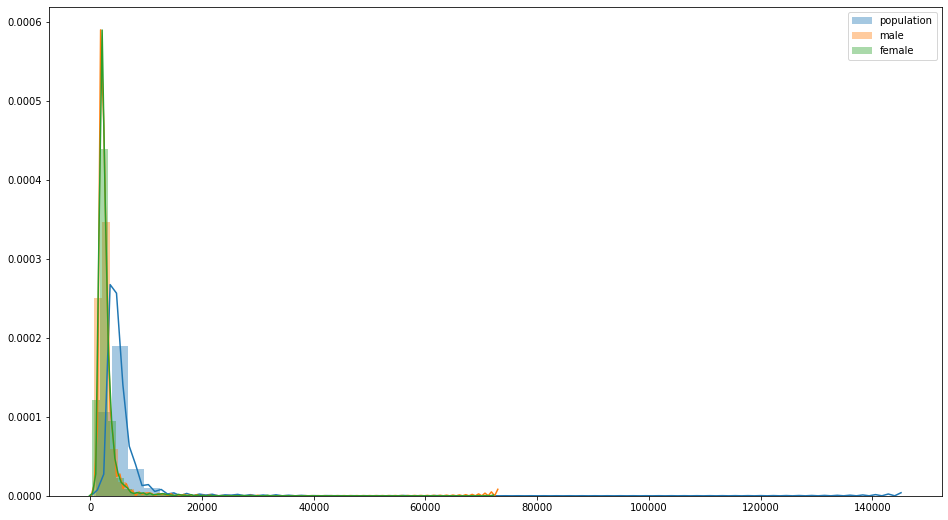

In [ ]:
total_county = data['countyFIPS'].unique()
nan_county = data.loc[data['C_TOT_POP'].isna()]['countyFIPS'].unique()
p=[]
m=[]
f=[]
for county in total_county:
    df = data_by_county.get_group(county).sort_values('date')
    covid = df['target'].mean()
    pop = df['C_TOT_POP'].mean()
    male = df['C_TOT_MALE'].mean()
    female = df['C_TOT_FEMALE'].mean()
    if county not in nan_county and covid>0:
        p.append(pop/covid)
        m.append(male/covid)
        f.append(female/covid)
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(p)
sns.distplot(m)
sns.distplot(f)
plt.legend(['population','male','female'])
plt.show()

In [ ]:
print(np.mean(p))
print(np.mean(m))
print(np.mean(f))

5516.329844128663
2759.601865849099
2756.727978279563


**let's also see statewise mean population data**

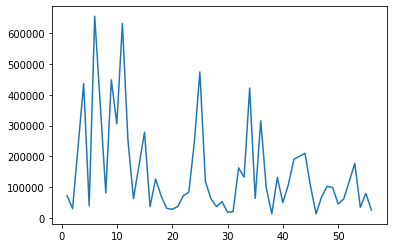

In [ ]:
state_wise_pop = data.groupby('stateFIPS')['C_TOT_POP'].mean()
plt.plot(state_wise_pop)

In [ ]:
nan_county = data.loc[data['C_TOT_POP'].isna()]['countyFIPS'].unique()
for c in nan_county:
    state = data.loc[data['countyFIPS']==c]['stateFIPS'].iloc[1]
    pop_mean = data.loc[data['stateFIPS']==state]['C_TOT_POP'].mean()
    pop_rate = np.mean(p)*data_by_county.get_group(c)['target'].mean()
    print(pop_mean,pop_rate)

29848.458333333332 794.3514975545274
29848.458333333332 16387.17719029155
29848.458333333332 558.9880908717046
29848.458333333332 1015.0046913196741
29848.458333333332 220.65319376514654
29848.458333333332 264.78383251817587
655886.724137931 308.9144712712052
81417.20634920635 50132.405623441286
253432.31818181818 5452222.736233429
315649.37096774194 12253.60736042447
12604.538461538461 29979.413926224577


In [ ]:
nan_county = data.loc[data['C_TOT_POP'].isna()]['countyFIPS'].unique()
for c in nan_county:
    print(data_by_county.get_group(c)['target'].mean())

0.144
2.970666666666667
0.10133333333333333
0.184
0.04
0.048
0.056
9.088
988.3786666666666
2.2213333333333334
5.434666666666667


pop for 11 counties are unavailable and since there is a large variation in average covid cases ,we will fill those pop columns by taking average pop statewise for those counties.


In [ ]:
def fill_pop(data,data_by_county):
    county = data.loc[data['C_TOT_POP'].isna()]['countyFIPS'].unique()
    columns = ['C_TOT_POP','C_TOT_MALE','C_TOT_FEMALE','C_WA_MALE','C_WA_FEMALE','C_MinorityPCT','C_BlackPCT','C_HispanicPCT']
    
    for c in county:
        df = data_by_county.get_group(c)
        state = df['stateFIPS'].iloc[1]
        
        indexes = df.index
        for col in columns:
            mean_val = data.loc[data['stateFIPS']==state][col].mean()
            df[col].fillna(mean_val,inplace=True)
            for ind in indexes:
                data[col][ind] = mean_val
    return data

In [ ]:
data = fill_pop(data,data_by_county)

In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# 3. Electricity related columns

In [ ]:
data.loc[data['Electricity_Sales_ Revenue_Residential ($ x1000)'].isna()]['countyFIPS'].nunique()

3145

In [ ]:
data.loc[data['Electricity_Sales_ Revenue_Residential ($ x1000)'].isna()]

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,target
987530,1001,1,2020-12-01,2818,41,2.0,8.0,NaN,NaN,-18.0,6.0,144.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1593842,32506,143,6997,12.1,15.9,14.4,58233.0,55514.0,27053.0,28461.0,21383.0,22185.0,0.2364,0.18,0.0257,25445.0,24585.0,3.0,15984.0,2364672.0,NaN,NaN,934.0,NaN,NaN,31.0,36.0,29.0,105.0,15215.0,108.0,304.0,163.0,4.0,5.0,1328.0,108.0,510.0,487.0,1892.0,1780.0,25.0,20.0,0.762340,11599.0,15215.0,0.170234,0.129632,0.342512,0.869679,38
987531,1003,1,2020-12-01,9051,137,-10.0,1.0,-5.0,2.0,-23.0,4.0,129.31,NaN,173.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1593842,32506,143,6997,10.1,13.5,13.3,59871.0,190790.0,93035.0,97755.0,81423.0,85193.0,0.1679,0.10,0.0458,96167.0,92725.0,4.0,15984.0,2364672.0,NaN,NaN,-424.0,-267.0,-337.0,31.0,36.0,29.0,105.0,15215.0,108.0,304.0,163.0,4.0,5.0,1328.0,108.0,510.0,487.0,1892.0,1780.0,25.0,20.0,0.762340,11599.0,15215.0,0.170234,0.129632,0.342512,0.869679,161
987532,1005,1,2020-12-01,1189,11,-1.0,NaN,NaN,NaN,-19.0,4.0,151.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1593842,32506,143,6997,27.1,41.0,39.5,35972.0,27201.0,14602.0,12599.0,7397.0,6338.0,0.5355,0.47,0.0509,9684.0,9136.0,6.0,15984.0,2364672.0,NaN,NaN,NaN,NaN,NaN,31.0,36.0,29.0,105.0,15215.0,108.0,304.0,163.0,4.0,5.0,1328.0,108.0,510.0,487.0,1892.0,1780.0,25.0,20.0,0.762340,11599.0,15215.0,0.170234,0.129632,0.342512,0.869679,11
987533,1007,1,2020-12-01,1204,18,NaN,-1.0,NaN,NaN,-16.0,NaN,18

**let's check whether these columns are useful or not**

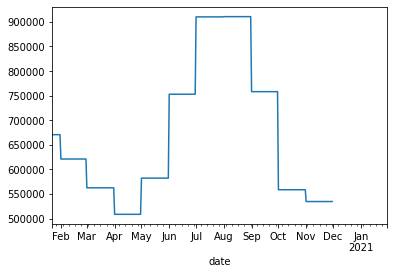

In [ ]:
df = data_by_county.get_group(1003)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df['Electricity_Sales_ Revenue_Residential ($ x1000)'].plot()
plt.show()

**electricity revenue first falls during mar-jun and then suddenly raise during jul-sep and then again fall , so it's like seasonal data**

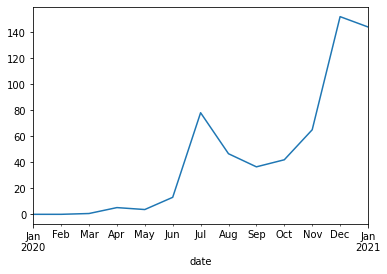

In [ ]:
df['target'].resample('M').mean().plot()

There is some seasonal relation between ele and target columns 
we will fill all electricity columns with the next valid values in county wise dataframe 

In [ ]:
def fill_ele(data,data_by_county):
    county = data['countyFIPS'].unique()
    columns = ['Electricity_Sales_ Revenue_Residential ($ x1000)','Electricity_Sales_ Sales_Residential (MWHr)','Electricity_Sales_ Customers_Count_Residential','Electricity_Sales_ Revenue_Commercial ($ x1000)','Electricity_Sales_ Sales_Commercial (MWHr)','Electricity_Sales_ Customers_Count_Commercial','Electricity_Sales_ Revenue_Industrial ($ x1000)','Electricity_Sales_ Sales_Industrial (MWHr)','Electricity_Sales_ Customers_Count_Industrial','Electricity_Sales_ Revenue_Transportation ($ x1000)','Electricity_Sales_ Sales_Transportation (MWHr)','Electricity_Sales_ Customers_Count_Transportation']
    cnt=0
    for c in county:
        df = data_by_county.get_group(c)
        indexes = df.index
        for col in columns:
            df[col].fillna(method='ffill',inplace=True)
            df[col].fillna(method='bfill',inplace=True)
        data.loc[indexes,columns] = df.loc[indexes,columns]
        if cnt%100==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data = fill_ele(data,data_by_county)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [ ]:
data.loc[data['Electricity_Sales_ Revenue_Residential ($ x1000)'].isna()]['countyFIPS'].nunique()

0

In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# Hospital related columns

In [ ]:
data.loc[data['critical_staffing_shortage_today_yes_SD'].isna()]['countyFIPS'].nunique()

2484

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199D54A7608>,
      dtype=object)

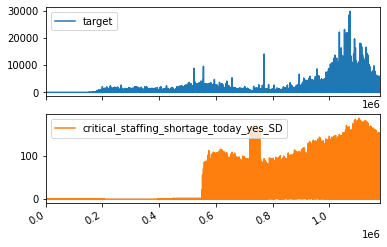

In [ ]:
data[['target','critical_staffing_shortage_today_yes_SD']].plot(subplots=True)

**As covid increases no of critical_staff shortage increase which is aslo obvious . So let's look at a particular county**

<Figure size 1152x648 with 0 Axes>

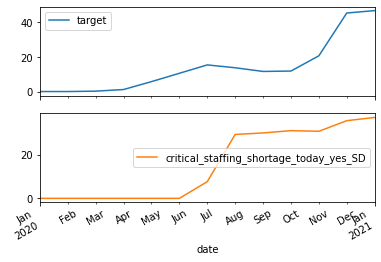

In [ ]:
df = data_by_county.get_group(1001)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.figure(figsize=(16,9))
df[['target','critical_staffing_shortage_today_yes_SD']].resample('M').mean().plot(subplots=True)
plt.show()

**So it is confirmed now. Let's fill the missing values by it's bfill or ffill. There is some seasonal relation between ele and target columns .We will fill all electricity columns with the next valid values in county wise dataframe**

In [ ]:
def fill_hos(data,data_by_county):
    county = data.loc[data['critical_staffing_shortage_today_yes_SD'].isna()]['countyFIPS'].unique()
    columns = ['critical_staffing_shortage_today_yes_SD',
           'critical_staffing_shortage_anticipated_within_week_yes_SD',
           'hospital_onset_covid_SD', 'hospital_onset_covid_coverage_SD',
           'inpatient_beds_SD', 'inpatient_beds_coverage_SD',
           'previous_day_admission_adult_covid_confirmed_SD',
           'previous_day_admission_adult_covid_suspected_SD',
           'previous_day_admission_pediatric_covid_confirmed_SD',
           'previous_day_admission_pediatric_covid_suspected_SD',
           'staffed_adult_icu_bed_occupancy_SD',
           'staffed_adult_icu_bed_occupancy_coverage_SD',
           'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD',
           'staffed_icu_adult_patients_confirmed_covid_SD',
           'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD',
           'total_adult_patients_hospitalized_confirmed_covid_SD',
           'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD',
           'total_pediatric_patients_hospitalized_confirmed_covid_SD',
           'inpatient_beds_utilization_SD',
           'inpatient_beds_utilization_numerator_SD',
           'inpatient_beds_utilization_denominator_SD',
           'percent_of_inpatients_with_covid_SD',
           'inpatient_bed_covid_utilization_SD',
           'adult_icu_bed_covid_utilization_SD', 'adult_icu_bed_utilization_SD']    
    cnt=0
    for c in county:
        df = data_by_county.get_group(c)
        indexes = df.index
        for col in columns:
            df[col].fillna(method='bfill',inplace=True)
            df[col].fillna(method='ffill',inplace=True)
        data.loc[indexes,columns] = df.loc[indexes,columns]
        if cnt%100==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data = fill_hos(data,data_by_county)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# employment columns

In [ ]:
data.loc[data['C_M_Labour_Force_corr'].isna()]['countyFIPS'].nunique()

3145

**Let's plot these columns for a particular county**

<Figure size 1152x648 with 0 Axes>

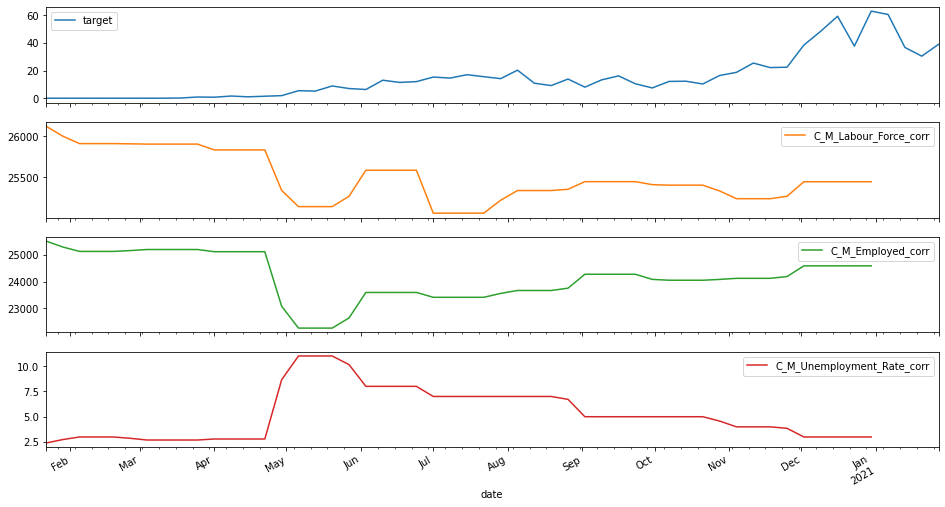

In [ ]:
df = data_by_county.get_group(1001)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.figure(figsize=(16,9))
df[['target','C_M_Labour_Force_corr','C_M_Employed_corr','C_M_Unemployment_Rate_corr']].resample('7D').mean().plot(subplots=True,figsize=(16,9))
plt.show()

**Plot these columns on an average of 7days for all county combined**

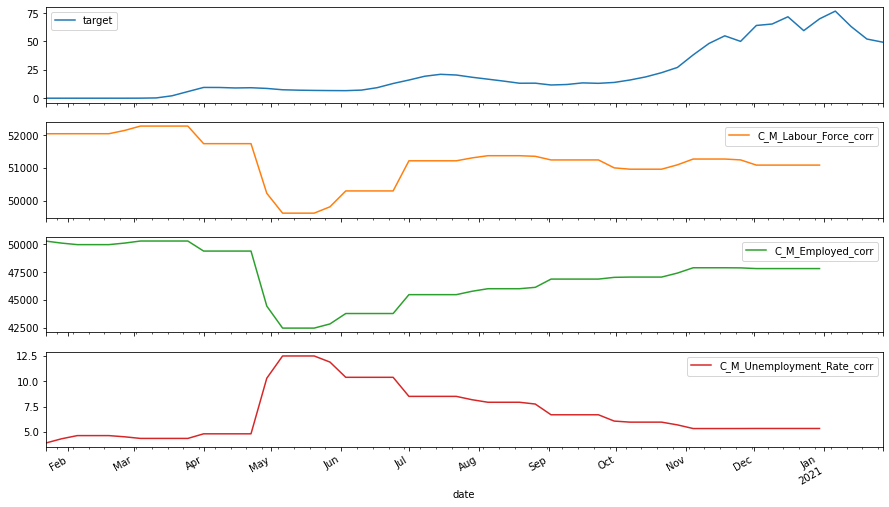

In [ ]:
data_copy = data.copy()
data_copy['date'] = pd.to_datetime(data_copy['date'])
data_copy = data_copy.set_index('date')
data_copy[['target','C_M_Labour_Force_corr','C_M_Employed_corr','C_M_Unemployment_Rate_corr']].resample('7D').mean().plot(subplots=True,figsize=(15,9))
plt.show()

**As both are identical we can assume that this pattern follows for every county , it can be seen that it falls during may-jul and then situation starts improving .It is not much affected by covid cases . We can also fill it by bfill method because of the trend.**

In [ ]:
def fill_emp(data,data_by_county):
    county = data['countyFIPS'].unique()
    columns = ['C_M_Labour_Force_corr','C_M_Employed_corr','C_M_Unemployment_Rate_corr']
    
    cnt=0
    for c in county:
        df = data_by_county.get_group(c)
        indexes = df.index
        for col in columns:
            df[col].fillna(method='bfill',inplace=True)
            df[col].fillna(method='ffill',inplace=True)
        data.loc[indexes,columns] = df.loc[indexes,columns]
        if cnt%100==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data = fill_emp(data,data_by_county)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

**Unfortunately still 1500 remains missing**

In [ ]:
data.loc[data['C_M_Labour_Force_corr'].isna()].countyFIPS.unique()

array([ 2270,  6000, 15005,     1], dtype=int64)

In [ ]:
data.loc[data['C_M_Labour_Force_corr'].isna()].stateFIPS.unique()

array([ 2,  6, 15, 36], dtype=int64)

I think the best way to fill these values is to take the daily average of it's state and fill those NaNs

In [ ]:
def fill_emp_again(data,data_by_county):
    county = data.loc[data['C_M_Labour_Force_corr'].isna()].countyFIPS.unique()
    print(county)
    columns = ['C_M_Labour_Force_corr','C_M_Employed_corr','C_M_Unemployment_Rate_corr']
    
    for c in county:
        state = data.loc[data['countyFIPS']==c]['stateFIPS'].iloc[1]
        df = data_by_county.get_group(c)
        indexes = df.index
        for col in columns:
            col_date = data.loc[data['stateFIPS']==state].groupby('date')[col].mean()
            df[col]=col_date.values
        
        data.loc[indexes,columns] = df.loc[indexes,columns]
    return data

In [ ]:
data = fill_emp_again(data,data_by_county)
data.isna().sum()

[ 2270  6000 15005     1]


countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# Unnecessary columns

**Since statewise test rate is not very useful as county wise data is already given and it also contains lots of missing values and there isn't any way to fill them in my view, so it's better to remove them. Similarly initclaims will also not be very much useful to cases prediction,so remove them also**

In [ ]:
data.drop(['S_D_dly_new_test','S_D_cummulative_test','initclaims_count_regular_cw','initclaims_rate_regular_cw','YoY_Reopened_Seated_Diner_Data'],axis=1,inplace=True)
#let's again grouped them
data_by_county = data.groupby('countyFIPS')
data_by_date = data.groupby('date')

In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

# Flights columns

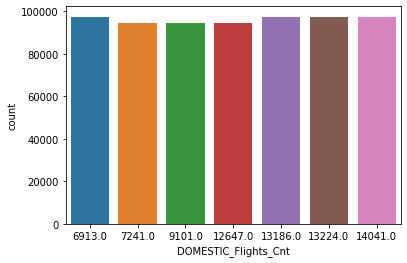

In [ ]:
sns.countplot(data['DOMESTIC_Flights_Cnt'])

In [ ]:
data['DOMESTIC_Flights_Cnt'].unique()

array([   nan,  7241.,  6913.,  9101., 13224., 14041., 12647., 13186.])

In [ ]:
data['INTERNATIONAL_Flights_Cnt'].unique()

array([  nan,  301.,  253.,  393.,  814.,  908.,  960., 1136.])

In [ ]:
data['INTERNATIONAL_Flights_Cnt'].value_counts().sort_values

<bound method Series.sort_values of 253.0     97495
1136.0    97495
908.0     97495
814.0     97495
393.0     94350
301.0     94350
960.0     94350
Name: INTERNATIONAL_Flights_Cnt, dtype: int64>

In [ ]:
97495/3145

31.0

In [ ]:
94350/3145

30.0

**It seems that it is overall US data month wise and some months data is missing,

4 31 days months and 3 30 days months is available and 6 months data is missing

Let's check which months data is missing**

In [ ]:
data_copy = data.copy()
data_copy['date'] = pd.to_datetime(data_copy['date'])
data_copy.loc[data_copy['INTERNATIONAL_Flights_Cnt'].isna()]['date'].dt.month.unique()

array([ 1,  2,  3, 11, 12], dtype=int64)

**So jan 20, feb 20, mar 20, nov 20, dec 20,jan 21 is missing**

**Checking monthly wise flight count**

In [ ]:

for r in range(4,11):
    print(r,data.loc[data_copy['date'].dt.month==r]['INTERNATIONAL_Flights_Cnt'].iloc[1])

4 301.0
5 253.0
6 393.0
7 814.0
8 908.0
9 960.0
10 1136.0


In [ ]:
data['INTERNATIONAL_Air_Passengers'].value_counts().sort_values

<bound method Series.sort_values of 93792.0    97495
73152.0    97495
59593.0    97495
11913.0    97495
74579.0    94350
26725.0    94350
13213.0    94350
Name: INTERNATIONAL_Air_Passengers, dtype: int64>

**Since flights counts and passengers data is of total county and also month wise ,it will not help to predict the covid cases county wise .So it's better to remove them**

In [ ]:
data.drop(['INTERNATIONAL_Air_Passengers','INTERNATIONAL_Flights_Cnt','DOMESTIC_Flights_Cnt','DOMESTIC_Air_Passengers'],axis=1,inplace=True)
#let's again grouped them
data_by_county = data.groupby('countyFIPS')
data_by_date = data.groupby('date')

# covid test columns

In [ ]:
data.loc[data['test_count']=='.']

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,target
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,101.51,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.000,0.00,0.0,.,.,.,.,12.1,15.9,14.4,58233.0,55514.0,27053.0,28461.0,21383.0,22185.0,0.2364,0.18,0.0257,26127.0,25513.0,2.4,116.0,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.12,NaN,94.32,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.000,0.00,0.0,.,.,.,.,10.1,13.5,13.3,59871.0,190790.0,93035.0,97755.0,81423.0,85193.0,0.1679,0.10,0.0458,95993.0,93689.0,2.4,269.0,-17.0,-495.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.000,0.00,0.0,.,.,.,.,27.1,41.0,39.5,35972.0,27201.0,14602.0,12599.0,7397.0,6338.0,0.5355,0.47,0.0509,8624.0,8349.0,3.2,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.000,0.00,0.0,.,.,.,.,20.3,25.9,25.2,47918.0,22597.0,12195.0,10402.0,8903.0,8326.0,0.2545,0.22,0.0204,8752.0,8534.0,2.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,91.56,NaN,NaN,6706

In [ ]:
data['test_count'].dtype

dtype('O')

**Since it is a object type first let's convert it into float**

In [ ]:
data[['test_count','test_rate','new_test_rate','new_test_count']] = data_copy[['test_count','test_rate','new_test_rate','new_test_count']]
data[['test_count','test_rate','new_test_rate','new_test_count']] = data[['test_count','test_rate','new_test_rate','new_test_count']].replace('.',np.nan)

In [ ]:
data[['test_count','test_rate','new_test_rate','new_test_count']] = data[['test_count','test_rate','new_test_rate','new_test_count']].astype('float')

**Now value is replaced with NaN**

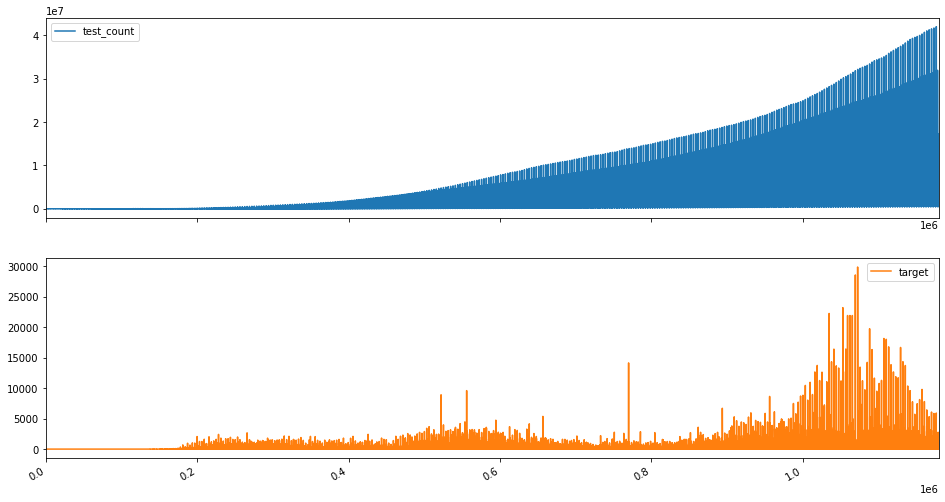

In [ ]:
data[['test_count','target']].plot(subplots=True,figsize=(16,9))
plt.show()

In [ ]:
data_copy = data.copy()
data_by_date = data.groupby('date')
data_by_county = data.groupby('countyFIPS')

**Plot monthly test and target**

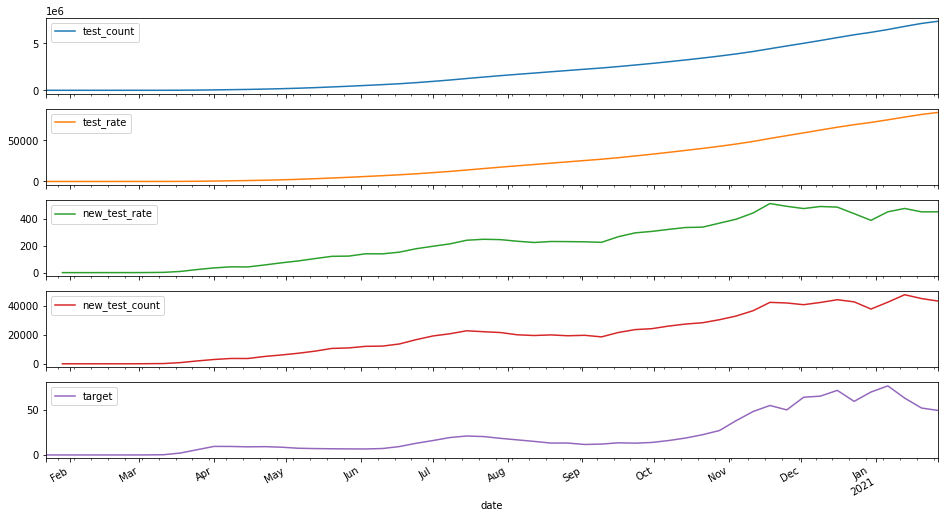

In [ ]:
data_copy['date'] = pd.to_datetime(data_copy['date'])
data_copy = data_copy.set_index(data_copy['date'])
data_copy[['test_count','test_rate','new_test_rate','new_test_count','target']].resample("7D").mean().plot(subplots=True,figsize=(16,9))
plt.show()

In [ ]:
print(data_copy['2020-1']['test_rate'].mean())
print(data_copy['2020-2']['test_rate'].mean())
print(data_copy['2020-3']['test_rate'].mean())

0.010056963064295507
5.186021641541018
85.90438685590831


**Fill those missing values by ffill**

In [ ]:
def fill_test(data,data_by_county):
    county = data['countyFIPS'].unique()
    columns = ['test_count','test_rate','new_test_rate','new_test_count']
    cnt=0
    for c in county:
        df = data_by_county.get_group(c)
        indexes = df.index
        for col in columns:
            df[col].fillna(method='bfill',inplace=True)
            df[col].fillna(method='ffill',inplace=True)
        data.loc[indexes,columns] = df.loc[indexes,columns]
        if cnt%100==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data = fill_test(data,data_by_county)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

In [ ]:
data_copy2 = data.copy()
data_copy2['date'] = pd.to_datetime(data_copy2['date'])
data_copy2 = data_copy2.set_index(data_copy2['date'])
print(data_copy2['2020-1']['test_rate'].mean())
print(data_copy2['2020-2']['test_rate'].mean())
print(data_copy2['2020-3']['test_rate'].mean())

3.937953614626091
3.945981217038334
75.15587324396073


# spends,merchants,revenue

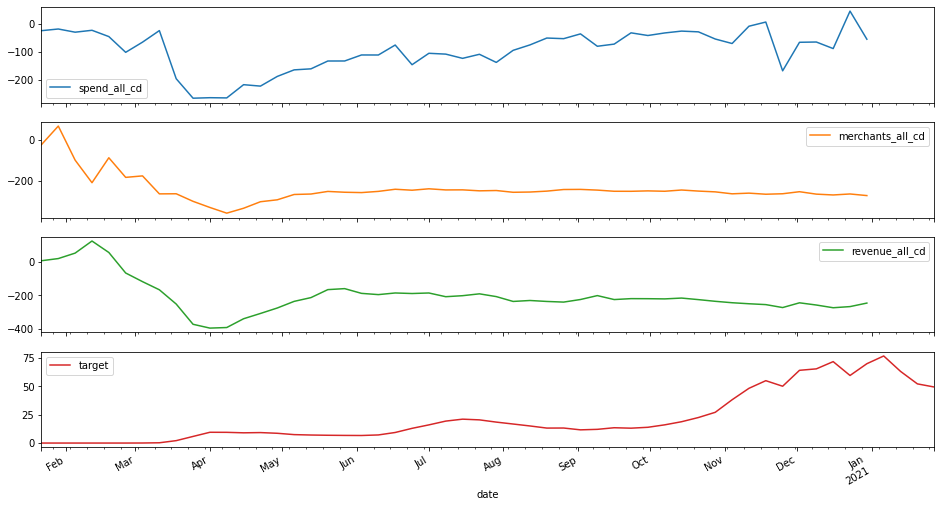

In [ ]:
data_copy[['spend_all_cd','merchants_all_cd','revenue_all_cd','target']].resample('7D').mean().plot(subplots=True,figsize=(16,9))
plt.show()

**So as expected , as covid spread more and more, no of small bussiness decrease and so does revenue**

In [ ]:
data.loc[data['spend_all_cd'].isna()]

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,target
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,0.0,0.0,0.0816,4.0,27.1,41.0,39.5,35972.0,27201.0,14602.0,12599.0,7397.0,6338.0,0.5355,0.47,0.0509,8624.0,8349.0,3.2,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,0.0,0.0,0.0816,4.0,20.3,25.9,25.2,47918.0,22597.0,12195.0,10402.0,8903.0,8326.0,0.2545,0.22,0.0204,8752.0,8534.0,2.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
5,1011,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,0.0,0.0,0.0816,4.0,30.0,39.9,39.0,31906.0,10474.0,5701.0,4773.0,1762.0,1086.0,0.7739,0.70,0.0762,4757.0,4588.0,3.6,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
6,1013,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,124.31,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,0.0,0.0,0.0816,4.0,21.6,34.6,32.8,39944.0,20307.0,9498.0,10809.0,5293.0,5760.0,0.4632,0.44,0.0120,9225.0,8906.0,3.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
8,1017,1,2020-01-22,

In [ ]:
data.loc[data['spend_all_cd'].isna()]['countyFIPS'].nunique()

3145

**Let's see month wise missing data**

In [ ]:
for i in range(1,13):
    print(data_copy['2020-{}'.format(i)]['spend_all_cd'].isna().sum())
print(data_copy['2021-1']['spend_all_cd'].isna().sum())

14578
42230
45112
43692
45112
43692
45154
45112
43692
45154
43650
51886
92625


**Nearly missing values are distributed equally among months .Jan 21 data is completely missing**

In [ ]:
data_by_date['revenue_all_cd'].mean().isna().sum()

0

**We can fill these columns by bfill nd ffill methods**

In [ ]:
def fill_rem(data,data_by_date):
    
    columns = ['spend_all_cd','merchants_all_cd','revenue_all_cd','target']
    date = data_by_date['target'].mean().index
    cnt=0
    
    data['date'] = pd.to_datetime(data['date'])
    for d in date:
        for col in columns:
            df = data.loc[data[col].isna()]
            df = df.loc[df['date']==d]
            df[col].fillna(data_by_date[col].mean()[d],inplace=True)
            indexes = df.index
            data.loc[indexes,col] = df.loc[indexes,col]
        if cnt%10==0:
            print(cnt)
        cnt = cnt+1
    return data

In [ ]:
data_by_date['target'].mean().index

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
       '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30'],
      dtype='object', name='date', length=375)

In [ ]:
data = fill_rem(data,data_by_date)
data.isna().sum()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370


countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                      612456
google_mobility_grocery_and_pharmacy                                       666890
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                 342711
google_mobility_residential                                                722806
apple_mobility_driving                                                     422931
apple_mobility_t

**Remove these columns**

In [ ]:
data.drop(['spend_all_cd','merchants_all_cd','revenue_all_cd','target'],axis=1,inplace=True)
data_by_county = data.groupby('countyFIPS')
data_by_date = data.groupby('date')

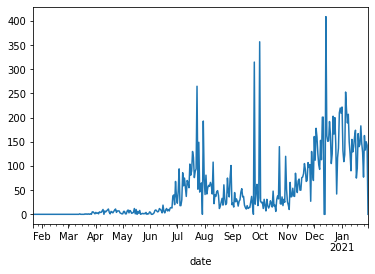

In [ ]:
df = data_by_county.get_group(1003)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df['confirmed_cases'].diff().plot()
plt.show()

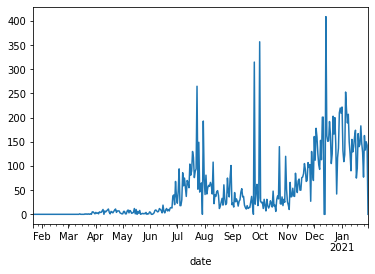

In [ ]:
df = data_by_county.get_group(1003)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df['confirmed_cases'].diff().plot()
plt.show()

# Google mobility report

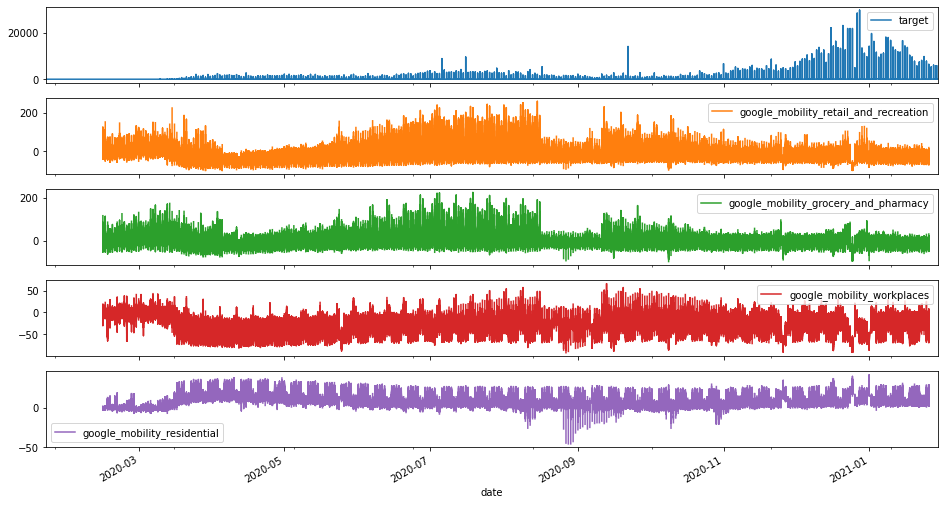

In [ ]:
#ploting the mobility reports columns wrt time

data_copy[['target','google_mobility_retail_and_recreation','google_mobility_grocery_and_pharmacy','google_mobility_workplaces','google_mobility_residential']].plot(subplots=True,figsize=(16,9))
plt.show()

It contains a lots of spikes, but it is visible that as cases increases workplace and grocery mobility decreases

**Extracting date time features for our model**

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['day'] = data['date'].dt.day

**We will only train for 5 features,rest have lots of missing values so it's better to remove them**

We will train a machine learning model to predict the mobility reports columns and fill them

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

columns_target = ['google_mobility_retail_and_recreation',
            'google_mobility_grocery_and_pharmacy',
           'google_mobility_workplaces',
           'google_mobility_residential',
           'apple_mobility_driving']

columns_train = ['target', 'deaths','test_count',
                 'test_rate', 'new_test_rate', 'new_test_count', 'C_PCTPOVALL_2019',
                 'C_PCTPOV017_2019', 'C_PCTPOV517_2019', 'C_MEDHHINC_2019', 'C_TOT_POP',
                 'C_TOT_MALE', 'C_TOT_FEMALE', 'C_WA_MALE', 'C_WA_FEMALE',
                 'C_MinorityPCT', 'C_BlackPCT', 'C_HispanicPCT', 'C_M_Labour_Force_corr',
                 'C_M_Employed_corr', 'C_M_Unemployment_Rate_corr','year','month','week','day']

for col in columns_target:
    data_train = data.loc[data[col].notna()]
    data_test = data.loc[data[col].isna()]
    
    data_train.drop(['date'],axis=1,inplace=True)
    data_test.drop(['date'],axis=1,inplace=True)

    X_train = data_train[columns_train]
    y_train = data_train[col]
    X_test = data_test[columns_train]
    
    indexes = data_test.index
    
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train,y_train)
    pred = gbr.predict(X_test)
    data.loc[indexes,col]=pred

In [ ]:
data.isna().sum()

countyFIPS                                                                      0
stateFIPS                                                                       0
date                                                                            0
confirmed_cases                                                                 0
deaths                                                                          0
google_mobility_retail_and_recreation                                           0
google_mobility_grocery_and_pharmacy                                            0
google_mobility_parks                                                      982458
google_mobility_transit_stations                                           860704
google_mobility_workplaces                                                      0
google_mobility_residential                                                     0
apple_mobility_driving                                                          0
apple_mobility_t

In [ ]:
#Drop the columns having huge nan values
data.drop(['google_mobility_parks','google_mobility_transit_stations','apple_mobility_transit','apple_mobility_walking'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

countyFIPS                                                                0
stateFIPS                                                                 0
date                                                                      0
confirmed_cases                                                           0
deaths                                                                    0
google_mobility_retail_and_recreation                                     0
google_mobility_grocery_and_pharmacy                                      0
google_mobility_workplaces                                                0
google_mobility_residential                                               0
apple_mobility_driving                                                    0
Electricity_Sales_ Revenue_Residential ($ x1000)                          0
Electricity_Sales_ Sales_Residential (MWHr)                               0
Electricity_Sales_ Customers_Count_Residential                            0
Electricity_

In [ ]:
data.to_csv('data_preprocessed.csv') #Saving the cleaned data